# The detailed demonstration of the tropical rainfall diagnostic for ICON data: 
# Graphical representation of the histograms 

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of histogram of precipitation/tropical precipitation](#2-calculation-of-histogram-of-precipitationtropicalprecipitation)

3. [Graphical representation of the histograms](#4-histograms-of-tropical-precipitationn)

    3.1 [Different styles of plots](#41-different-styles-of-plots)

    3.1.1 [Histogram of counts with a smooth line style](#311-histogram-of-counts-with-a-smooth-linestyle-smooth--true)

    3.1.2 [Histogram of counts with a step line style](#312-histogram-of-counts-with-a-step-linestyle-step--true)

    3.1.3.[Histogram of pdf with a `viridis` color map](#313-histogram-of-pdf-with-a-viridis-color-map-color_map--true)
        
    3.1.4. [Histogram of pdf with any color map](#314-histogram-of-pdf-with-a-any-color-map-color_map--gist_heat)

    3.2  [ Saving the figure to the storage](#32-saving-the-figure-to-the-storage)

    3.3 [ Plotting the histogram of the counts, frequency, and pdf](#33-plotting-the-histogram-of-counts-frequency-and-pdf)


[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


#### ICON data

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09",  regrid="r100")
icon = reader.retrieve(regrid=True,  streaming=True, stream_step=3, stream_unit='days') 

## 2. Calculation of histogram of tropical precipitation


##### Initializing the class object with the following attributes: 
 - num_of_bins
 - first_edge
 - width_of_bin

In [8]:
diag = TR_PR_Diag(num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/20)

####  The tropical latitude band, by default, is the following

In [5]:
diag.trop_lat

10

In [4]:
hist_icon  = diag.histogram(icon)
hist_icon

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 2.5e-08 7.5e-08 ... 9.25e-07 9.75e-07
    width          (center_of_bin) float64 5e-08 5e-08 5e-08 ... 5e-08 5e-08
Data variables:
    counts         (center_of_bin) float64 8.579e+05 5.018e+04 ... 875.0
    frequency      (center_of_bin) float64 0.8326 0.04871 ... 0.0008493
    pdf            (center_of_bin) float64 1.665e+07 9.741e+05 ... 1.699e+04
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-19 19:02:59 regrid...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

#### Initialization of diagnostic with a log spaced bins

In [5]:
bins = [1.00000000e-09, 1.63789371e-09, 2.68269580e-09, 4.39397056e-09,
       7.19685673e-09, 1.17876863e-08, 1.93069773e-08, 3.16227766e-08,
       5.17947468e-08, 8.48342898e-08, 1.38949549e-07, 2.27584593e-07,
       3.72759372e-07, 6.10540230e-07, 1.00000000e-06]

In [6]:
diag = TR_PR_Diag(bins = bins)

In [7]:
hist_icon_trop_logspaced  = diag.histogram(icon)
hist_icon_trop_logspaced

<xarray.Dataset>
Dimensions:        (center_of_bin: 14)
Coordinates:
  * center_of_bin  (center_of_bin) float64 1.319e-09 2.16e-09 ... 8.053e-07
    width          (center_of_bin) float64 6.379e-10 1.045e-09 ... 3.895e-07
Data variables:
    counts         (center_of_bin) int64 26050 28164 30182 ... 30324 22300 12104
    frequency      (center_of_bin) float64 0.06091 0.06586 ... 0.05214 0.0283
    pdf            (center_of_bin) float64 9.549e+07 6.303e+07 ... 7.267e+04
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 1522142023-06-19 19:02:59 regrid...
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

#

## 3. Plotting the histograms of tropical precipitation

### The function `hist_figure` has a big set of arguments.

#### The first and major group of arguments relates to the histogram type: 

* `pdf`-histogram: `pdf=True`, also it is default value, 

* `frequency`-histogram: `frequency=True, pdf=False`,

* `counts`-histogram: `frequency=False, pdf=False`.

#### The second group of arguments related to the plot style:


* `smooth` (bool, True by default):     if True, smooth 2D line

* `step` (bool, False by default):      if True, step line 

* `color_map` (bool/str, False/'viridis' by default):   if not False, color map plot

#### The third set of arguments involves the figure settings:

* `ls` (str, '-'):              The line style for the plot. 

* `ylogscale` (bool, True):     The logarithmic scale for the y-axis. 

* `xlogscale` (bool, False):    The logarithmic scale for the x-axis. 

* `color` (str, 'tab:blue'):    The color of the plot. 
            
* `figsize` (float, 1):         The size of the figure. 

* `legend` (str, '_Hidden'):    The legend label for the plot. 

* `varname` (str, 'Precipitation'):    The name of the variable for the x-axis label. 

* `plot_title` (str, None):     The title of the plot.
            
* `loc` (str, 'upper right'):   The location of the legend. 

* `add/fig` (tuple, None):      Tuple of (fig, ax) to add the plot to an existing figure. / The figure object to plot on.

* `path_to_figure` (str, None): The path to save the figure. If provided, saves the figure at the specified path.

### 3.1 Different styles of the plots

##### 3.1.1 Histogram of counts with a `smooth` line style (`smooth = True`)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='Counts'>,
 <Figure size 640x400 with 1 Axes>}

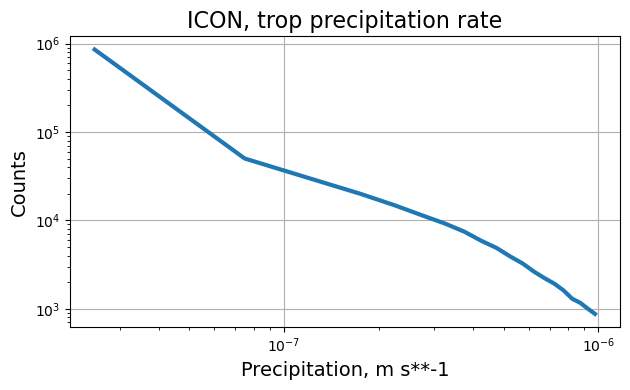

In [13]:
diag.hist_figure(hist_icon, pdf=False, figsize=0.8, 
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

##### 3.1.2 Histogram of counts with a `step` line style (`step = True`)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='Counts'>,
 <Figure size 640x400 with 1 Axes>}

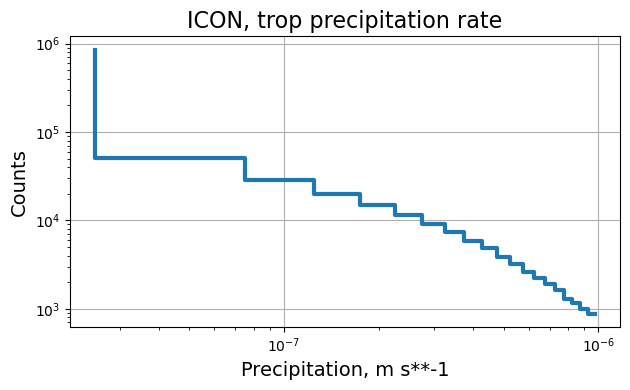

In [14]:
diag.hist_figure(hist_icon, pdf=False, smooth=False, step = True, figsize=0.8, 
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

##### 3.1.3 Histogram of pdf with a `viridis` color map (`color_map = True`)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

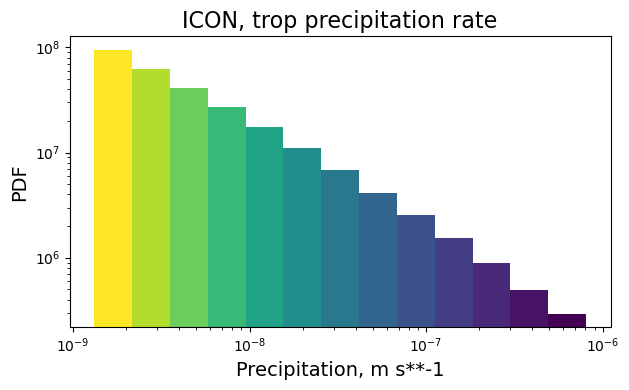

In [15]:
diag.hist_figure(hist_icon_trop_logspaced, smooth = False, color_map = True, figsize=0.8, 
               xlogscale = True, ylogscale=True,  plot_title = "ICON, trop precipitation rate")

##### 3.1.4 Histogram of pdf with any color map (`color_map = 'gist_heat'`)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 560x350 with 1 Axes>}

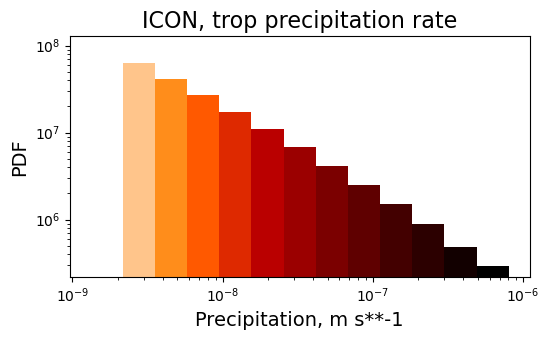

In [16]:
diag.hist_figure(hist_icon_trop_logspaced, smooth = False, color_map = 'gist_heat', figsize=0.7, 
               xlogscale = True, ylogscale=True,  plot_title = "ICON, trop precipitation rate")

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 560x350 with 1 Axes>}

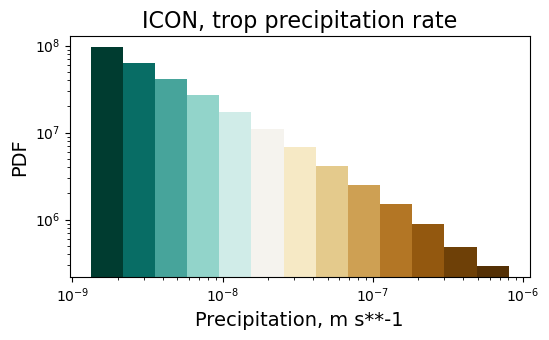

In [17]:
diag.hist_figure(hist_icon_trop_logspaced, smooth = False, color_map = 'BrBG', figsize=0.7, 
               xlogscale = True, ylogscale=True,  plot_title = "ICON, trop precipitation rate")

### 3.2 Saving the figure in the storage 

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 560x350 with 1 Axes>}

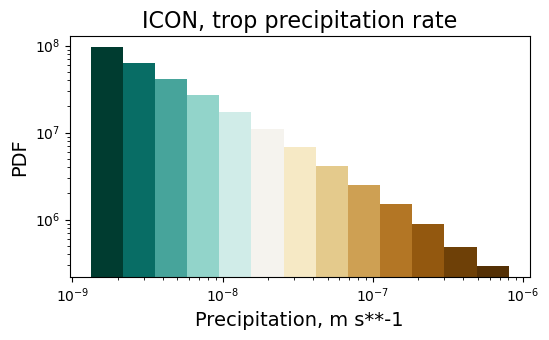

In [9]:
diag.hist_figure(hist_icon_trop_logspaced, smooth = False, color_map = 'BrBG', figsize=0.7, 
               xlogscale = True, ylogscale=True,  plot_title = "ICON, trop precipitation rate", path_to_figure='./any_path_any_name.png')

### 3.3 Plotting the histogram of counts, frequency, and pdf

##### Histogram of counts (`frequency=False, pdf = False`)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='Counts'>,
 <Figure size 640x400 with 1 Axes>}

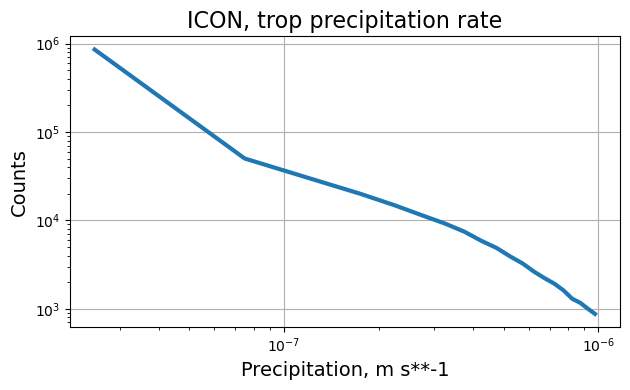

In [20]:
diag.hist_figure(hist_icon, frequency=False, pdf = False,  figsize=0.8, 
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

##### Histogram of frequency (`frequency=True, pdf=False`)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='Frequency'>,
 <Figure size 640x400 with 1 Axes>}

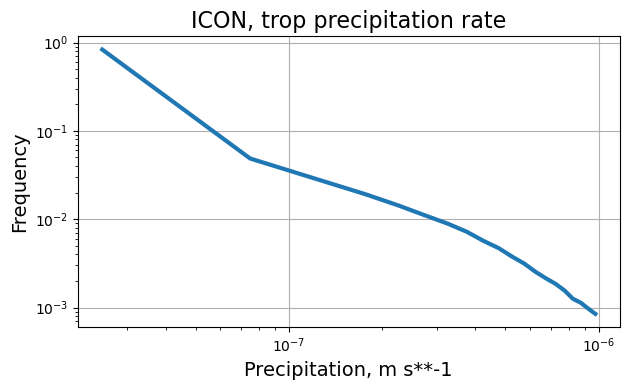

In [21]:
diag.hist_figure(hist_icon, frequency=True, pdf = False,  figsize=0.8, 
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

##### Histogram of pdf (`pdf=True`, also it is a default argument)

{<Axes: title={'center': 'ICON, trop precipitation rate'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

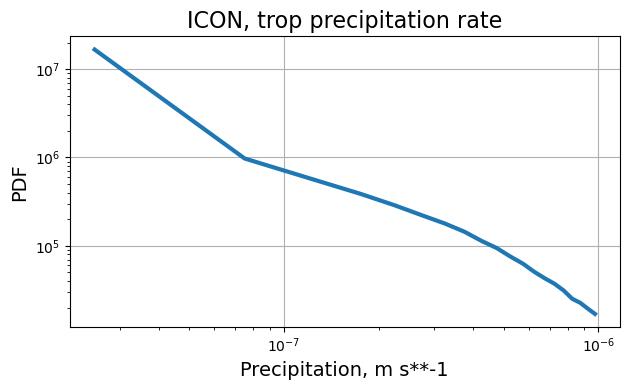

In [22]:
diag.hist_figure(hist_icon, pdf = True,  figsize=0.8, 
               xlogscale = True, ylogscale=True, plot_title = "ICON, trop precipitation rate")

[Back to the top of file](#structure)

#

##### The end